# US10

## Introduction
---
 US10 aims to assess the utilization of park amenities and depict the findings graphically to gain insights into the distribution of equipment usage among park-goers.

## Code and results
---

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

EQUIPMENT_USED_PATH = "EquipmentUsed.csv"

# Load the data
data = pd.read_csv(EQUIPMENT_USED_PATH)

# Calculate the counts and percentages of equipment usage
equipment_counts = data['Equipment'].value_counts()
total_users = len(data)
equipment_percentages = (equipment_counts / total_users) * 100

# Create a pie chart to visualize the data
plt.pie(equipment_percentages, labels=equipment_percentages.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('muted'))
plt.title('Percentage Use of Park Equipment')
plt.axis('equal')
plt.show()

## Analysis and Interpretation of the Results
---
The generated pie chart offers a visual representation of the distribution of park equipment usage based on the dataset. This graphical representation facilitates the identification of popular equipment types among park visitors and those that are less utilized. For instance, a significant portion of the pie chart occupied by 'walking trails' suggests a preference for this amenity among users. Conversely, a smaller segment for 'Exercise Equipment' implies comparatively lower usage, possibly influenced by factors such as accessibility, location, or user preferences.
Insights drawn from these patterns can aid park administrators in prioritizing maintenance tasks, considering upgrades, or introducing new equipment varieties to cater to user preferences. Moreover, it offers valuable insights into visitor behavior and park dynamics, informing future planning and development initiatives.

The percentage of usage for different types of park equipment can be calculated using the following formula:
$$
\text{Equipment Percentage} = \left( \frac{\text{Equipment Count}}{\text{Total Users}} \right) \times 100
$$

# US11

## Introduction
---
US11 aims to examine the utilization patterns of the park across different age groups.

## Code and results
---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Inquiry.csv", delimiter=";")

data['Escalao'] = data['Escalao'].astype('category')
data['Y/N'] = data['Y/N'].astype('category')

recommendation_proportion = data.groupby('Escalao')['Y/N'].value_counts(normalize=True).unstack()
print(recommendation_proportion)

sns.boxplot(x='Escalao', y='Visits', data=data)
plt.title('Monthly Frequency of Park Use by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency of Park Use (per month)')
plt.show()

In [3]:
# Analysis and Interpretation of the Results
---
### Recommendation Proportion

The data on recommendation proportion offers insights into the likelihood of different age groups accepting recommendations. It enables a direct comparison between the proportions of 'Yes' and 'No' responses within each age group.

For example, a higher proportion of 'Yes' responses in a specific age group suggests a greater inclination towards accepting recommendations.

Upon examination, we note that Age Group 2 exhibits a higher proportion of 'No' responses, indicating a lower propensity to accept recommendations compared to 'Yes' responses. Conversely, Age Group 3 demonstrates a slightly higher proportion of 'Yes' responses, suggesting a higher likelihood of accepting recommendations within that demographic. This indicates that both the youngest and oldest segments of the population are more inclined to recommend the park.

The recommendation proportion for each group is calculated using the following formula:
$$p = \frac{x}{n}$$
Where:
$$ p\text{ represents proportion} $$
$$ x\text{ represents the number of favorable outcomes}$$
$$ n\text{ represents the total number of outcomes.}$$

### Box Plot
The box plot extracted from the dataset provides a concise visual summary of park usage patterns across different age groups. It effectively illustrates the central tendencies, offering insights into the typical monthly frequency of park visits for each demographic category. Variations in the box plot indicate disparities in park usage behavior among various age groups.

For instance, if a particular age group, such as '3', displays a higher central tendency (indicated by the line within the box), it suggests more frequent park visitation compared to other groups.

SyntaxError: invalid syntax (2905513948.py, line 2)

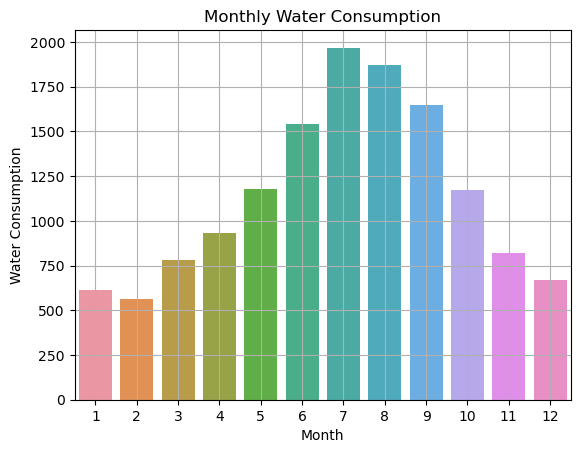

In [ ]:
#US09
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("water_consumption.csv", sep=";", decimal=",")

def filter_data(data, year, start_month, end_month, park):
    filtered_data = data[(data["Year"] == year) &
                         (data["Month"].between(start_month, end_month)) &
                         (data["Park"] == park)]
    return filtered_data


year = 2023 #Year
start_month = 1  #January
end_month = 12    # March
park_id = 'Oriental'

filtered_data = filter_data(data, year, start_month, end_month, park_id)


monthly_consumption = filtered_data.groupby('Month')['Consumption'].sum().reset_index()


sns.barplot(x='Month', y='Consumption', data=monthly_consumption)
plt.title('Monthly Water Consumption')
plt.xlabel('Month')
plt.ylabel('Water Consumption')
plt.grid(True)
plt.show()

def calculate_monthly_average(data, parks_to_analyze):

    filtered_data2 = data[data['Park'].isin(parks_to_analyze)]


    grouped_data = filtered_data2.groupby(['Park', 'Month'])['Consumption'].mean().reset_index()


    grouped_data.rename(columns={'Consumption': 'Average Consumption'}, inplace=True)

    return grouped_data

parks_to_analyze = input("Please input the parks that you wish to calculate the median, separated by commas: ").split(',')

average_consumption = calculate_monthly_average(data, parks_to_analyze)

print(average_consumption)

highest_consumption_park = data.groupby('Park')['Consumption'].sum().idxmax()
lowest_consumption_park = data.groupby('Park')['Consumption'].sum().idxmin()

highest_consumption_data = data[data['Park'] == highest_consumption_park]['Consumption']
lowest_consumption_data = data[data['Park'] == lowest_consumption_park]['Consumption']


highest_mean = highest_consumption_data.mean()
highest_median = highest_consumption_data.median()
highest_std = highest_consumption_data.std()
highest_skewness = highest_consumption_data.skew()

lowest_mean = lowest_consumption_data.mean()
lowest_median = lowest_consumption_data.median()
lowest_std = lowest_consumption_data.std()
lowest_skewness = lowest_consumption_data.skew()


def build_frequency_table(data, num_classes):
    frequency_table = pd.cut(data, bins=num_classes).value_counts().sort_index()
    relative_frequency = frequency_table / frequency_table.sum()
    return pd.DataFrame({'Absolute Frequency': frequency_table, 'Relative Frequency': relative_frequency})

num_classes = 5
highest_frequency_table = build_frequency_table(highest_consumption_data, num_classes)
lowest_frequency_table = build_frequency_table(lowest_consumption_data, num_classes)


def detect_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

highest_outliers = detect_outliers(highest_consumption_data)
lowest_outliers = detect_outliers(lowest_consumption_data)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(highest_consumption_data, bins=10, color='skyblue', edgecolor='black')
plt.title('Highest Consumption Park Histogram (10 classes)')
plt.xlabel('Water Consumption')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(lowest_consumption_data, bins=10, color='salmon', edgecolor='black')
plt.title('Lowest Consumption Park Histogram (10 classes)')
plt.xlabel('Water Consumption')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(highest_consumption_data, bins=100, color='skyblue', edgecolor='black')
plt.title('Highest Consumption Park Histogram (100 classes)')
plt.xlabel('Water Consumption')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(lowest_consumption_data, bins=100, color='salmon', edgecolor='black')
plt.title('Lowest Consumption Park Histogram (100 classes)')
plt.xlabel('Water Consumption')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Highest Consumption Park:")
print("Mean:", highest_mean)
print("Median:", highest_median)
print("Standard Deviation:", highest_std)
print("Coefficient of Skewness:", highest_skewness)
print("Outliers:", highest_outliers)

print("\nLowest Consumption Park:")
print("Mean:", lowest_mean)
print("Median:", lowest_median)
print("Standard Deviation:", lowest_std)
print("Coefficient of Skewness:", lowest_skewness)
print("Outliers:", lowest_outliers)






